# Dataset D4 - HIV

## Importing libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as tkr

## Data reading and formating - D4 HIV mixture

In [3]:
data = pd.read_csv('../summary_data/D4_HIV_summary.csv')

## Defining color dictionary

In [4]:
color_dict=dict({'Bfc':'purple','Bless':'orange','Coral':'brown','Fiona':'gray','Lighter':'pink','Musket':'blue','Pollux':'yellow','Racer':'green','Reckoner':'red','Sga':'black'})

## Selecting best kmer for each tool

In [5]:
data_best = data.loc[data.groupby(["Tool"])["Base Gain"].idxmax()]  

<br>
<br>

## Figure 4a
Bar plot depicting the gain across various error correction methods on viral sequencing data (D4 dataset). 
<br> Error-free reads for gold standard were obtained using UMI-based protocol. 
<br> For each tool, the best k-mer size was selected.

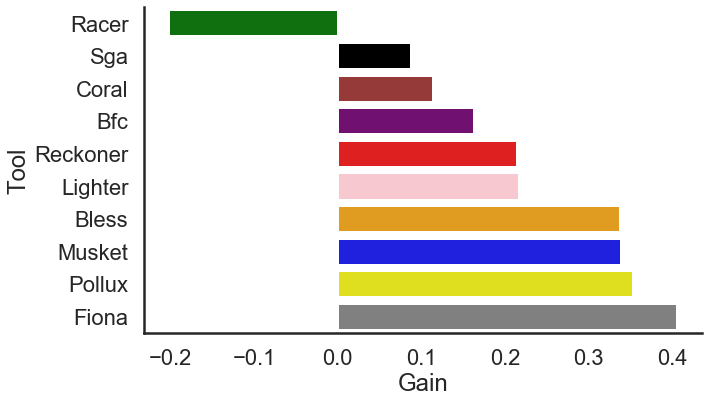

In [6]:
sns.set_style("white")
sns.set_context("poster")

g=sns.barplot(y="Tool", 
              x="Base Gain",
              data = data_best.sort_values(by="Base Gain", ascending=True), 
              palette=color_dict,
             errwidth=3)

g.set(xlabel='Gain', ylabel='Tool')

fig = plt.gcf()
fig.set_size_inches(10, 6)

sns.despine()

plt.savefig("../figures/D4_HIV/Fig4a_Gain.png", bbox_inches='tight')
plt.savefig("../figures/D4_HIV/Fig4a_Gain.pdf", bbox_inches='tight')

<br>
<br>

## Figure 4b
Scatter plot depicting the sensitivity (x-axis) and precision (y-axis) of each tool when applied viral sequencing data (D4 dataset).   
<br> Error-free reads for gold standard were obtained using UMI-based protocol. 
<br> For each tool, the best k-mer size was selected.

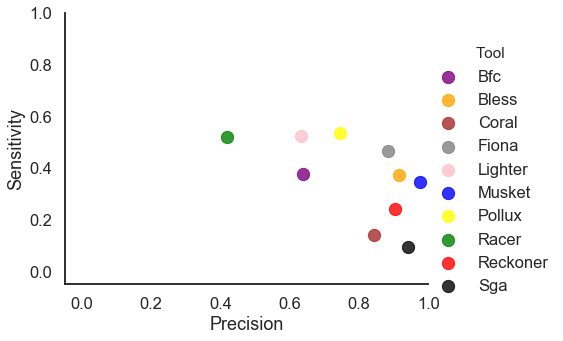

In [7]:
sns.set_style("white")
sns.set_context("talk")

g=sns.lmplot(data = data_best,
             x='Base Precision', 
             y='Base Sensitivity', 
             hue='Tool', 
             palette=color_dict, 
             fit_reg=False,
             aspect=1.3,
             scatter_kws={"s": 150})

plt.ylim(-.05, 1.0)
plt.xlim(-.05, 1.0)
g.set(xlabel='Precision', ylabel='Sensitivity')

sns.despine()

plt.savefig("../figures/D4_HIV/Fig4b_Precision_vs_Sensitivity.png", bbox_inches='tight')
plt.savefig("../figures/D4_HIV/Fig4b_Precision_vs_Sensitivity.pdf", bbox_inches='tight')

<br>
<br>

## Figure S18
The effect of k-mer size on the accuracy of the error correction tools for viral sequencing data (D4 dataset).
<br> Error-free reads for gold standard were obtained using UMI-based protocol. 
<br>We have excluded Fiona and Racer, as those tools do not provide options for k-mer size.


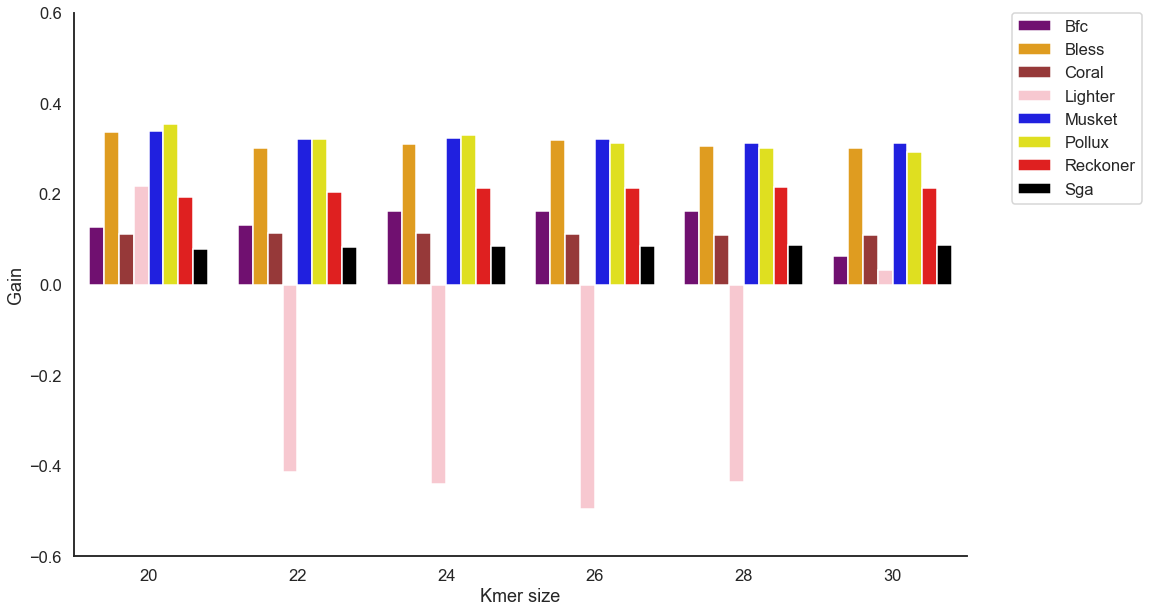

In [8]:
sns.set_style("white")
sns.set_context("talk")

g=sns.barplot( data = data[(data['Tool'] !='Racer') & (data['Tool'] !='Fiona')],
              x="Kmer Size", 
              y="Base Gain",           
              hue='Tool', 
              palette=color_dict)

g.set(xlabel='Kmer size', ylabel='Gain')

plt.ylim(-0.6, 0.6)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

fig = plt.gcf()
fig.set_size_inches(16, 10)

sns.despine()

plt.savefig("../figures/D4_HIV/FigS18_HIV_kmers_gain.png", bbox_inches='tight')
plt.savefig("../figures/D4_HIV/FigS18_HIV_kmers_gain.pdf", bbox_inches='tight')